In [1]:
pip install pandas scikit-learn matplotlib


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
    --------------------------------------- 0.3/15.5 MB ? eta -:--:--
    --------------------------------------- 0.3/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 989.2 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/15.5 MB 882.6 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/15.5 MB 882.6 kB/s eta 0:00:17
   -- ------------------------------------- 1.0/15.5 MB 729.5 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/15.5 MB 729.5 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/15.5 MB 729.5 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/15.5 MB 729.5 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/15.5 MB 729.5 kB/s eta 0:00:20
   -- ------------------------------------- 1.0/15.5 MB 729.5 kB/s eta 0:00:20
   --- ------------------------------------ 1.3/15.5 MB 482.8 kB/s eta 0:00:30


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Accuracy: 0.8894149065307113

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238


Confusion Matrix:
 [[6846  457]
 [ 454  481]]


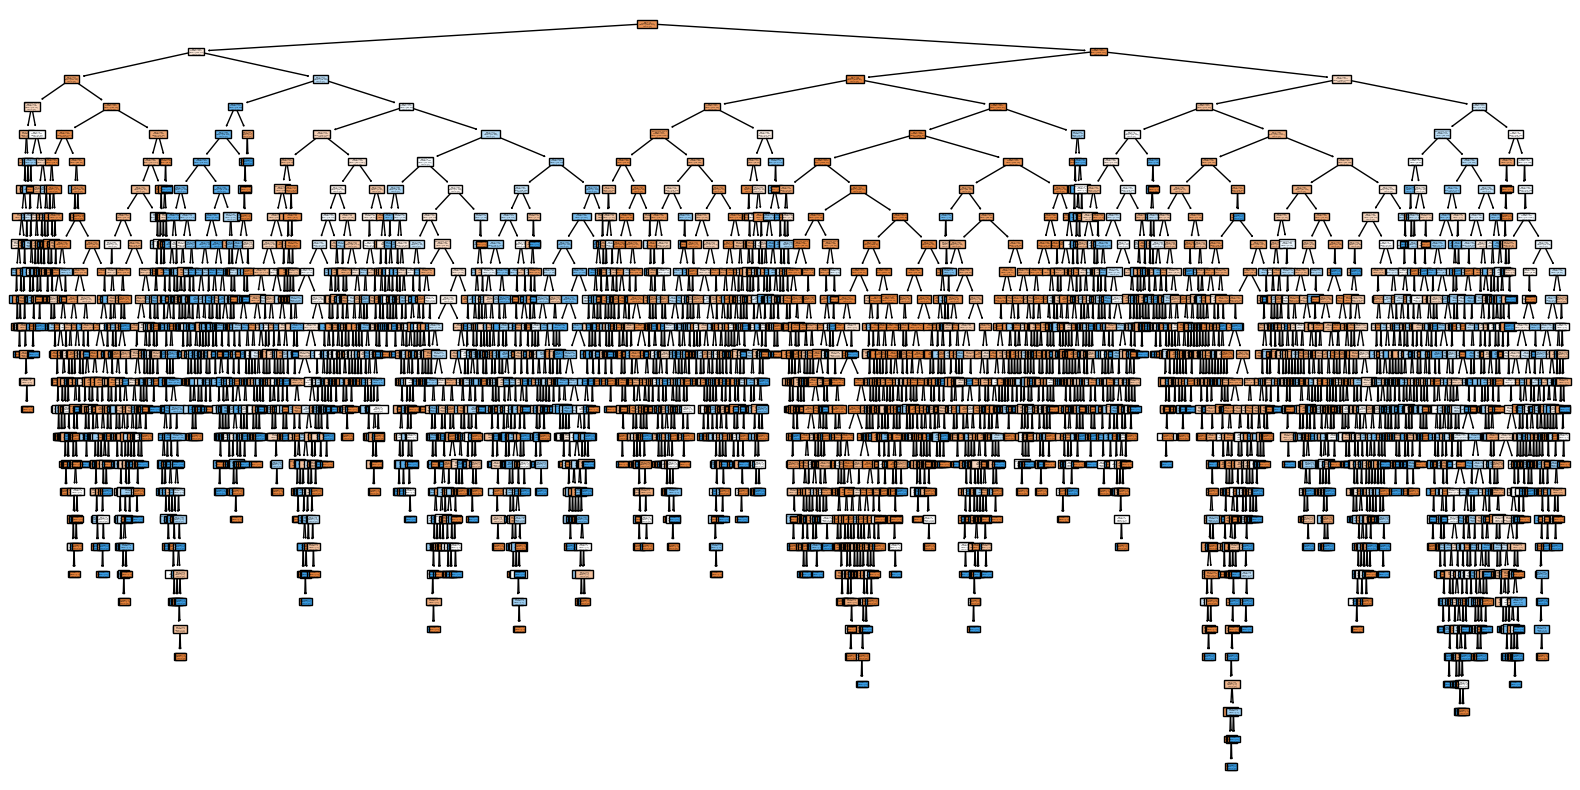

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load dataset with correct separator
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Clean column names (remove quotes if any)
df.columns = df.columns.str.strip().str.replace('"', '')

# Confirm column names
print(df.columns.tolist())

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Target column is 'y'
X = df.drop('y', axis=1)
y = df['y']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()
